<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=4>
            in His Name
        </font>
	</font>
</div>

<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Install and Import Package Python
        </font>
	</font>
</div>

In [ ]:
!pip install -r requirements.txt

In [3]:
import joblib
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string
import random

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
import sklearn.metrics as metrics


<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Generate Random Dataset
        </font>
	</font>
</div>

In [4]:
# Sample Count
n_sample = 1000

# Generate Random Numeric Columns
_X, _y= datasets.make_regression(n_samples=n_sample,#number of samples
                                      n_features=2,#number of features
                                      noise=10,#bias and standard deviation of the guassian noise
                                      random_state=0) #set for same data points for each run
# Generate Random Letter Column
alphabet = list(string.ascii_lowercase)
letter_col = random.choices(alphabet,k=n_sample)

# Final Sample Data Set
df = pd.concat([pd.DataFrame(_X,columns=["est_num1","est_num2"])
                   ,pd.DataFrame(letter_col,columns=["est_letter"])
                   ,pd.DataFrame(_y,columns=["target"])]
               , axis=1)

In [6]:
df.head()

,est_num1,est_num2,est_letter,target
0,0.499498,1.267412,m,79.916503
1,-0.477974,-1.843070,z,-110.304857
2,-0.134822,-1.626322,k,-54.411647
3,-0.468476,-0.401558,k,-43.518259
4,0.346494,1.145262,h,62.336008


<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Preprocessing
        </font>
	</font>
</div>

In [7]:
# Convert Categorical Column to Numeric Columns with One-Hot Encoding
df["est_letter"] = df["est_letter"].astype(pd.CategoricalDtype(categories=alphabet))
df = pd.get_dummies(df)

In [9]:
df.head()

,est_num1,est_num2,target,est_letter_a,est_letter_b,est_letter_c,est_letter_d,est_letter_e,est_letter_f,est_letter_g,...,est_letter_q,est_letter_r,est_letter_s,est_letter_t,est_letter_u,est_letter_v,est_letter_w,est_letter_x,est_letter_y,est_letter_z
0,0.499498,1.267412,79.916503,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.477974,-1.843070,-110.304857,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.134822,-1.626322,-54.411647,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.468476,-0.401558,-43.518259,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.346494,1.145262,62.336008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Check Correlation matrix
        </font>
	</font>
</div>

In [ ]:
corr_mat=df.loc[:, df.columns != 'target'].corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
plt.show()


<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=red size=3>
            There is any correlation in estimators.
        </font>
	</font>
</div>

<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Find the best model
        </font>
	</font>
</div>

In [ ]:
# Define X as estimators and y as target
X = df.loc[:, df.columns != 'target'].values
y = df['target'].values

# Split Data to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Check Modeling
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=10)))  # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

# Evaluate each model in turn
results = []
names = []

print("Models Evaluations: ")
for name, model in models:
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)

    # evaluate model
    cv_results = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

    results.append(cv_results)
    names.append(name)
    print('   %s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))



<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Compare Algorithms
        </font>
	</font>
</div>

In [ ]:
plt.figure()
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison (R2)')
plt.show()

<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=red size=3>
LinearRegression, Rigide and RandomForest perform equally well.
But I personally prefer RandomForestRegression since this ensemble model (combine multiple ‘individual’ (diverse) models together
and deliver superior prediction power.)
can almost work out of the box and that is one reason why they are very popular.
        </font>
	</font>
</div>

<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Grid Searching Hyperparameters to find the best RandomForest Model
        </font>
	</font>
</div>

In [ ]:
model = RandomForestRegressor()
param_search = {
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=cv, param_grid=param_search, scoring = "r2",n_jobs=-1)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print("Best Model is RandomForestRegressor with this hyperparameters:")
print("    n_estimators: " , best_model.n_estimators )
print("    max_features: " , best_model.max_features)
print("    max_depth   : " , best_model.max_depth)


<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Checking best model performance on test data
        </font>
	</font>
</div>

In [ ]:
y_true = y_test
y_pred = best_model.predict(X_test)

# Regression metrics
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
mse=metrics.mean_squared_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)

print("Best Model Performance****")
print('   explained_variance: ', round(explained_variance,4))
print('   r2: ', round(r2,4))
print('   MAE: ', round(mean_absolute_error,4))
print('   MSE: ', round(mse,4))
print('   RMSE: ', round(np.sqrt(mse),4))

<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Save Model
        </font>
	</font>
</div>

In [ ]:
# serialize model
joblib.dump(best_model, 'models/final_prediction_model.mdl')

# serialize model
joblib.dump(best_model, 'models/final_prediction_model.mdl')

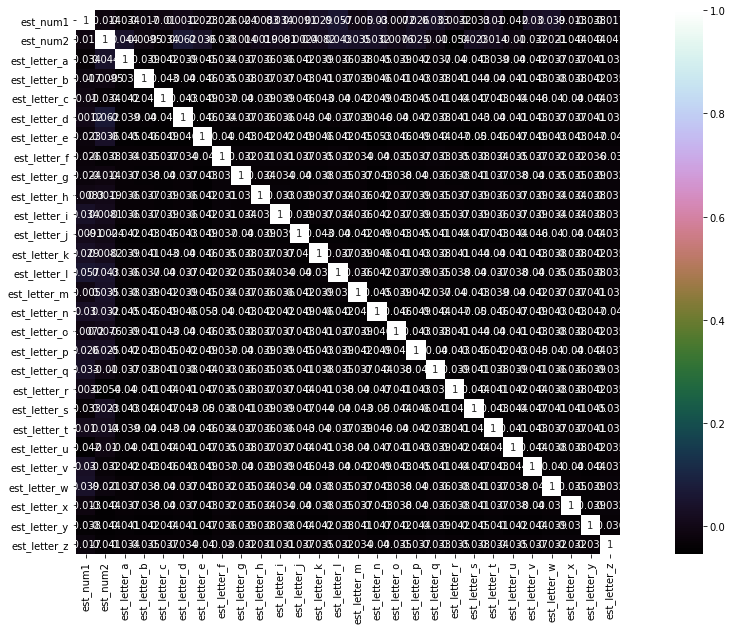

In [10]:
corr_mat=df.loc[:, df.columns != 'target'].corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
plt.show()


<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=red size=3>
            There is any correlation in estimators.
        </font>
	</font>
</div>

<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Find the best model
        </font>
	</font>
</div>

In [12]:
# Define X as estimators and y as target
X = df.loc[:, df.columns != 'target'].values
y = df['target'].values

# Split Data to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Check Modeling
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=10)))  # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

# Evaluate each model in turn
results = []
names = []

print("Models Evaluations: ")
for name, model in models:
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)

    # evaluate model
    cv_results = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

    results.append(cv_results)
    names.append(name)
    print('   %s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


Models Evaluations: 
   LinearRegression: 0.971618 (0.005704)
   Ridge: 0.971723 (0.005623)
   BayesianRidge: 0.971690 (0.005651)
   KNN: 0.862451 (0.026764)
   RandomForest: 0.948451 (0.014010)
   SVR: 0.641463 (0.022318)



<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Compare Algorithms
        </font>
	</font>
</div>

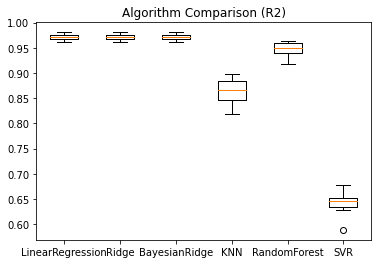

In [13]:
plt.figure()
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison (R2)')
plt.show()

<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=red size=3>
LinearRegression, Rigide and RandomForest perform equally well.
But I personally prefer RandomForestRegression since this ensemble model (combine multiple ‘individual’ (diverse) models together
and deliver superior prediction power.)
can almost work out of the box and that is one reason why they are very popular.
        </font>
	</font>
</div>

<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Grid Searching Hyperparameters to find the best RandomForest Model
        </font>
	</font>
</div>

In [14]:
model = RandomForestRegressor()
param_search = {
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=cv, param_grid=param_search, scoring = "r2",n_jobs=-1)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print("Best Model is RandomForestRegressor with this hyperparameters:")
print("    n_estimators: " , best_model.n_estimators )
print("    max_features: " , best_model.max_features)
print("    max_depth   : " , best_model.max_depth)


Best Model is RandomForestRegressor with this hyperparameters:
    n_estimators:  20
    max_features:  auto
    max_depth   :  14


<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=blue size=3>
            Checking best model performance on test data
        </font>
	</font>
</div>

In [15]:
y_true = y_test
y_pred = best_model.predict(X_test)

# Regression metrics
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
mse=metrics.mean_squared_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)

print("Best Model Performance****")
print('   explained_variance: ', round(explained_variance,4))
print('   r2: ', round(r2,4))
print('   MAE: ', round(mean_absolute_error,4))
print('   MSE: ', round(mse,4))
print('   RMSE: ', round(np.sqrt(mse),4))

Best Model Performance****
   explained_variance:  0.9551
   r2:  0.955
   MAE:  9.4901
   MSE:  140.9389
   RMSE:  11.8718


<p></p>
<br />
<div id="sec_madules" style="line-height:300%;">
	<font  size=3>
        <font color=#0f6d02 size=5>
            Save Model
        </font>
	</font>
</div>

In [16]:
# serialize model
joblib.dump(best_model, 'models/final_prediction_model.mdl')

['models/final_prediction_model.mdl']